# Titanic Disaster

**The sinking of the Titanic is one of the most infamous shipwrecks in history.**


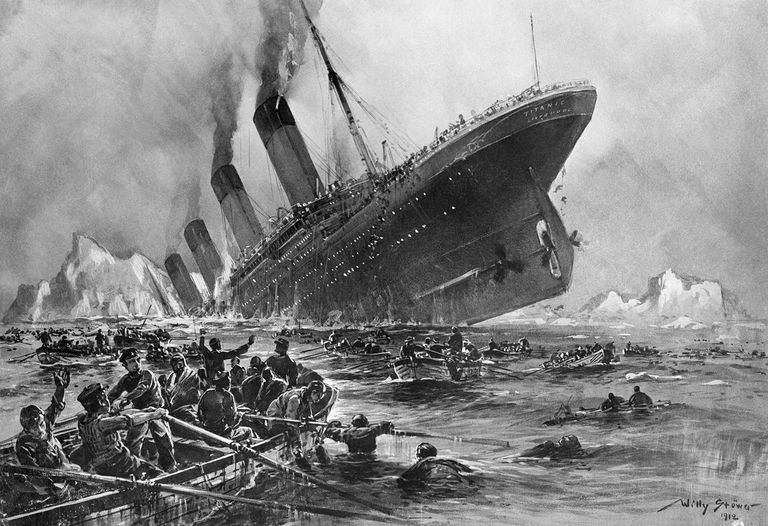

- On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

- While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

- In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


### VARIABLE DESCRIPTIONS:

`Pclass  --> Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
survival --> Survival (0 = No; 1 = Yes)
name     --> Name
sex      --> Sex
age      --> Age
sibsp    --> Number of Siblings/Spouses Aboard
parch    --> Number of Parents/Children Aboard
ticket   --> Ticket Number
fare     --> Passenger Fare (British pound)
cabin    --> Cabin
embarked --> Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat     --> Lifeboat
body     --> Body Identification Number
home     --> .dest Home/Destination`

In [1]:
#Importing numpy, pandas and matplotlib for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print("Train head\n", train.head())

print("Test head\n",test.head())

Train head
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN  

In [4]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
df = pd.concat([train,test])

In [7]:
df.head().isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          3
Embarked       0
dtype: int64

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df['Sex'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Sex, Length: 1309, dtype: bool

In [10]:
df['Age'].isnull().sum()

263

In [11]:
df['Fare'].isnull().sum()

1

In [12]:
df['Embarked'].isnull().sum()

2

In [13]:
df['Cabin'].isnull().sum()

1014

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [15]:
### For numeric Data
#1. made histogram to understand distributions, corrplot, pivot_tables
### Categorical Data
#2. Bar charts,pivot tables

In [16]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [17]:
df.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [18]:
df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [19]:
df_cat = df[['Survived',"Pclass",'Sex','Ticket','Cabin','Embarked']]
df_num = df[['Age','SibSp','Parch',"Fare"]]

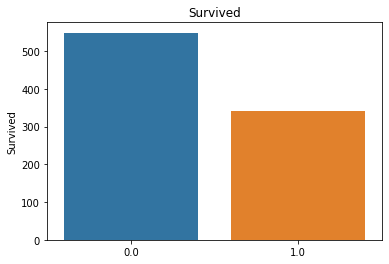

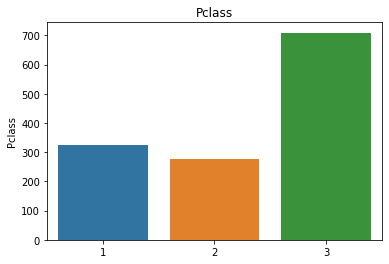

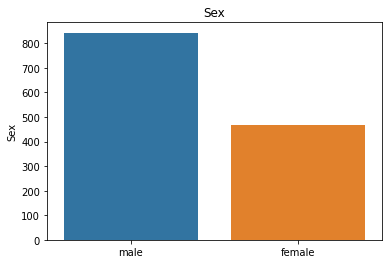

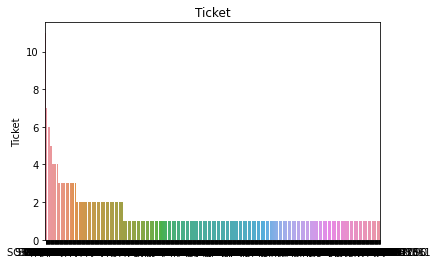

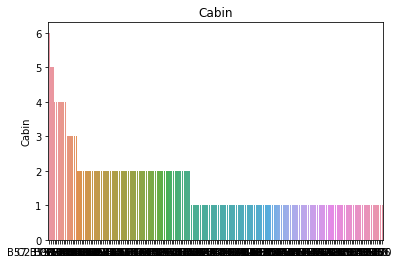

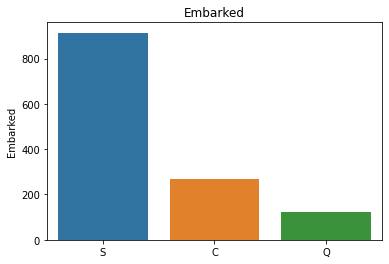

In [20]:
import seaborn as sns
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

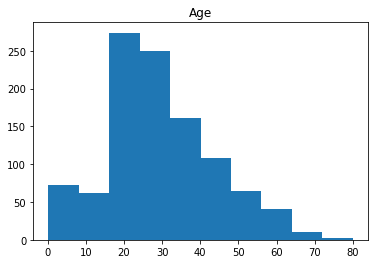

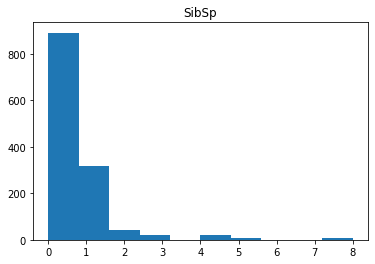

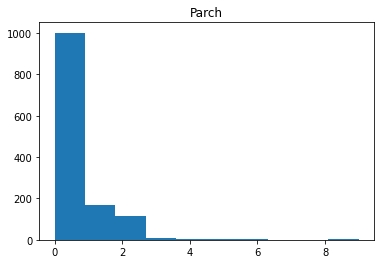

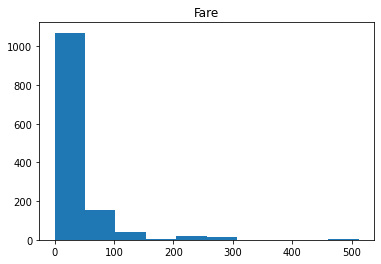

In [21]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

          Survived    Pclass
Survived  1.000000 -0.338481
Pclass   -0.338481  1.000000


<AxesSubplot:>

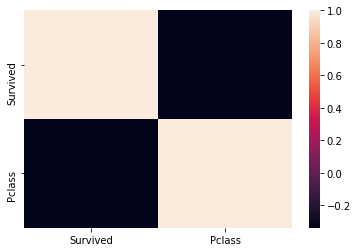

In [22]:
print(df_cat.corr())
sns.heatmap(df_cat.corr())

            Age     SibSp     Parch      Fare
Age    1.000000 -0.243699 -0.150917  0.178740
SibSp -0.243699  1.000000  0.373587  0.160238
Parch -0.150917  0.373587  1.000000  0.221539
Fare   0.178740  0.160238  0.221539  1.000000


<AxesSubplot:>

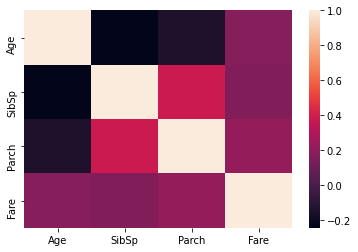

In [23]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [24]:
pd.pivot_table(df,index = 'Survived',values=['Age','SibSp',"Parch","Fare"])

,Age,Fare,Parch,SibSp
Survived,,,,
0.0,30.626179,22.117887,0.329690,0.553734
1.0,28.343690,48.395408,0.464912,0.473684


In [25]:
print(pd.pivot_table(df,index = "Survived",columns = 'Pclass', values='Ticket',aggfunc='count'))

Pclass      1   2    3
Survived              
0.0        80  97  372
1.0       136  87  119


In [26]:
print(pd.pivot_table(df,index = "Survived",columns = 'Sex', values='Ticket',aggfunc='count'))

Sex       female  male
Survived              
0.0           81   468
1.0          233   109


In [27]:
print(pd.pivot_table(df,index = "Survived",columns = 'Embarked', values='Ticket',aggfunc='count'))

Embarked   C   Q    S
Survived             
0.0       75  47  427
1.0       93  30  217


In [28]:
df['Cabin'].value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
B96 B98            4
C78                4
                  ..
C47                1
C82                1
B80                1
B86                1
C70                1
Name: Cabin, Length: 186, dtype: int64

In [29]:
df['cabin_multiple']=df.Cabin.apply(lambda x:0 if pd.isna(x)else len(x.split(' ')))

In [30]:
df['cabin_multiple'].value_counts()

0    1014
1     254
2      26
3      10
4       5
Name: cabin_multiple, dtype: int64

In [31]:
pd.pivot_table(df,index='Survived',columns='cabin_multiple',values='Ticket',aggfunc='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0.0,481.0,58.0,7.0,3.0,NaN
1.0,206.0,122.0,9.0,3.0,2.0


In [32]:
df['cabin_adv'] = df.Cabin.apply(lambda x: str(x)[0])

In [33]:
df['cabin_adv'].value_counts()

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin_adv, dtype: int64

In [34]:
pd.pivot_table(df,index='Survived',columns='cabin_adv',values='Ticket',aggfunc='count')

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0.0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1.0,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [35]:
#converting Pclass to category
df.Pclass = df.Pclass.astype(str)

In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_multiple,cabin_adv
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n


In [37]:
df['Cabin'].isnull().sum()

1014

In [38]:
df.isnull().sum()

PassengerId          0
Survived           418
Pclass               0
Name                 0
Sex                  0
Age                263
SibSp                0
Parch                0
Ticket               0
Fare                 1
Cabin             1014
Embarked             2
cabin_multiple       0
cabin_adv            0
dtype: int64

In [39]:
#ticket variable understanding for output

df['numeri_Tic'] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

In [40]:
df['tic_letters'] = df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [41]:
df['numeri_Tic'].head()

0    0
1    0
2    0
3    1
4    1
Name: numeri_Tic, dtype: int64

In [42]:
df['numeri_Tic'].value_counts()

1    957
0    352
Name: numeri_Tic, dtype: int64

In [43]:
df['tic_letters'].head()

0        a5
1        pc
2    stono2
3         0
4         0
Name: tic_letters, dtype: object

In [44]:
df['tic_letters'].value_counts()

0            961
pc            92
ca            68
a5            28
sotonoq       24
stono2        21
scparis       19
wc            15
a4            10
fcc            9
c              8
soc            8
sopp           7
scah           4
pp             4
wep            4
fc             3
sotono2        3
swpp           2
sca4           2
sc             2
ppp            2
lp             1
scow           1
fa             1
scahbasle      1
casoton        1
sop            1
aq4            1
a2             1
sca3           1
aq3            1
sp             1
as             1
stonoq         1
Name: tic_letters, dtype: int64

In [45]:
pd.pivot_table(df,index='Survived',columns='numeri_Tic', values = 'Ticket', aggfunc='count')

numeri_Tic,0,1
Survived,,
0.0,142,407
1.0,88,254


In [46]:
pd.pivot_table(df,index='Survived',columns='tic_letters', values = 'Ticket', aggfunc='count')

tic_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0.0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1.0,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [47]:
df.Age = df.Age.fillna(df.Age.median())

In [48]:
df.Fare = df.Fare.fillna(df.Fare.median())

In [49]:
df.dropna(subset=['Embarked'],inplace=True)

**`Log Function:`**

- The log tranformation method used to address skewed data.

<AxesSubplot:>

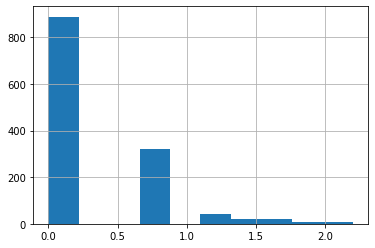

In [50]:
df['norm_sibsp'] = np.log(df.SibSp+1)
df['norm_sibsp'].hist()

<AxesSubplot:>

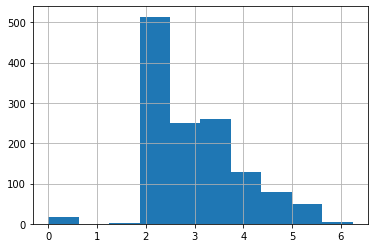

In [51]:
df['norm_Fare'] = np.log(df.Fare+1)
df["norm_Fare"].hist()

In [52]:
df.Pclass = df.Pclass.astype(str)

In [53]:
#feature engineering on persons title
print(df.Name.head(50))
df['name_title'] =df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [54]:
df['name_title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: name_title, dtype: object

In [55]:
df['name_title'].value_counts()

Mr              757
Miss            259
Mrs             196
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Ms                2
Major             2
Dona              1
Jonkheer          1
Sir               1
Capt              1
Lady              1
Mme               1
the Countess      1
Don               1
Name: name_title, dtype: int64

In [56]:
df.Pclass = df.Pclass.astype(str)

### what are the dummy variable creation

pd.get_dummies to create a dummy variable/indicator

In [57]:
#Example of dummy variable with simple coding
s = pd.Series(list('abca'))
pd.get_dummies(s)

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


In [58]:
s1 = ['a','b',np.nan]
pd.get_dummies(s1)

,a,b
0,1,0
1,0,1
2,0,0


In [59]:
pd.get_dummies(s1,dummy_na=True)

,a,b,NaN
0,1,0,0
1,0,1,0
2,0,0,1


In [60]:
#dummy variable creation

df_dummies=pd.get_dummies(df[['Pclass','Sex', 'Age','SibSp','Parch','Embarked','cabin_multiple','cabin_adv','numeri_Tic','name_title',"norm_Fare"]])

In [61]:
y= df.Survived

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [62]:
y = le.fit_transform(y)

In [63]:
y

array([0, 1, 1, ..., 2, 2, 2], dtype=int64)

In [64]:
df = df.drop(['Survived'],axis=1)

In [65]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_multiple', 'cabin_adv',
       'numeri_Tic', 'tic_letters', 'norm_sibsp', 'norm_Fare', 'name_title'],
      dtype='object')

In [66]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df_dummies_scaled = df_dummies.copy()
df_dummies_scaled[['Age','SibSp','Parch','norm_Fare']]= scale.fit_transform(df_dummies_scaled[['Age','SibSp','Parch','norm_Fare']])
df_dummies_scaled

,Age,SibSp,Parch,cabin_multiple,numeri_Tic,norm_Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,-0.580261,0.480272,-0.445407,0,0,-0.896331,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.662297,0.480272,-0.445407,1,0,1.347870,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,-0.269621,-0.479537,-0.445407,0,0,-0.815013,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
3,0.429318,0.480272,-0.445407,1,1,1.048255,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0.429318,-0.479537,-0.445407,0,1,-0.800632,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,-0.114301,-0.479537,-0.445407,0,0,-0.800632,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
414,0.739957,-0.479537,-0.445407,1,0,1.781098,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
415,0.701127,-0.479537,-0.445407,0,0,-0.896331,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
416,-0.114301,-0.479537,-0.445407,0,1,-0.800632,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [67]:
X = df_dummies_scaled

In [68]:
y

array([0, 1, 1, ..., 2, 2, 2], dtype=int64)

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state=6)

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
accuracy_score(y_test,rfc.predict(X_test))

0.5648854961832062

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.3220339  0.33617021 0.32340426 0.46382979 0.37446809]
0.36398124774612334


In [72]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.55508475 0.52340426 0.53191489 0.52765957 0.54042553]
0.5356978002163721


In [73]:
from sklearn import Tree
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print("The cross validation score:",cv)
print("mean of CV:", cv.mean())

ImportError: cannot import name 'Tree' from 'sklearn' (C:\Users\ppyad\.conda\envs\titanic\lib\site-packages\sklearn\__init__.py)

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print("the cross valid score:", cv)
print("The mean value is:",cv.mean())

the cross valid score: [0.52118644 0.48510638 0.50212766 0.48085106 0.51914894]
The mean value is: 0.5016840966462315


In [75]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
cv = cross_val_score(rf,X_train,y_train,cv=5)
print("the cross validation score:", cv)
print("The mean value is:",cv.mean())

the cross validation score: [0.52966102 0.45106383 0.48510638 0.46808511 0.50638298]
The mean value is: 0.4880598629642986


In [76]:
from sklearn.svm import SVC
svc = SVC()
cv = cross_val_score(svc,X_train,y_train,cv=5)
print("the cross validation score:", cv)
print("The mean value is:",cv.mean())

the cross validation score: [0.55084746 0.53617021 0.53617021 0.51914894 0.56595745]
The mean value is: 0.5416588532275515


In [77]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
cv = cross_val_score(xgb,X_train,y_train,cv=5)
print("the cross validation score:", cv)
print("The mean value is:",cv.mean())

[18:00:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:05:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:09:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:12:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [78]:
# Voting Classifier

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators = [('lr',lr),("knn",knn),('rf',rf),('gnb',gnb),
                                       ('svc',svc),('xgb',xgb)], voting='soft')

In [79]:
cv = cross_val_score(voting,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[18:14:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:14:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:14:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:14:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [81]:
def clf_perf(classifier,model_name):
    print(model_name)
    print('Best_score:' +str(classifier.best_score_))
    print('Best_params:' +str(classifier.best_params_))

In [82]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train,y_train)
clf_perf(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best_score:0.5433717994951317
Best_params:{'C': 0.03359818286283781, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


In [83]:
knn =KNeighborsClassifier()
param_grid = {'n_neighbors':[3,5,7,9],
              'weights':['uniform','distance'],
              'algorithm':['auto','ball_tree','kd_tree'],
              'p':[1,2]
             }
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train,y_train)
clf_perf(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best_score:0.5305878110349801
Best_params:{'algorithm': 'kd_tree', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


In [84]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train,y_train)
clf_perf(best_clf_svc,'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits
SVC
Best_score:0.5544320230796972
Best_params:{'C': 0.1, 'kernel': 'linear'}


In [85]:
import pickle
file = open('support_Vec_Classifier.pkl','wb')

#dump information
pickle.dump(svc,file)